In [3]:
import pickle as pkl
import matplotlib.pyplot as plt

from utils.plotting import plot_2x2
from utils.statistics import mann_whitney_effect_size, false_discovery
from utils.data import extract_2x2_data, standardize_df_data

In [4]:
# Matplotlib parameters
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 14,
    "font.size": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
}
plt.rcParams.update(tex_fonts)

In [5]:
# Load the experiment data
with open('experiment_data.pkl', 'rb') as f:
    df = pkl.load(f)

display(df)

,subject,first_block_strucutred,structured,type,first_choice,time_movement_first,time_movement_second,time_reaction_first,time_reaction_second
0,579e431a81f331000139d5d0,False,False,CSH,H,2.184,1.583,0.568,0.383
1,579e431a81f331000139d5d0,False,True,SH,S,1.570,1.453,0.503,0.401
2,579e431a81f331000139d5d0,False,True,CSH,H,2.554,1.701,1.722,0.433
3,579e431a81f331000139d5d0,False,True,CH,C,1.553,1.768,0.486,0.534
4,579e431a81f331000139d5d0,False,True,SH,S,2.921,1.701,0.637,0.283
...,...,...,...,...,...,...,...,...,...
4791,66fc60b6f59bcb7d6dba7d4f,True,False,CSH,H,2.821,1.233,0.938,0.166
4792,66fc60b6f59bcb7d6dba7d4f,True,False,CH,C,2.583,2.283,0.583,0.299
4793,66fc60b6f59bcb7d6dba7d4f,True,False,CSH,C,1.249,2.267,0.716,0.434
4794,66fc60b6f59bcb7d6dba7d4f,True,False,SH,H,1.784,1.884,0.368,0.650


## Aggregate data
Aggregate data from HSN and HS trials together to form the HS dataframe and do the same for the NSN and HN trials to create the HN dataframe.

In [6]:
df_hs = df[(df['type'] == 'CSH') | (df['type'] == 'SH')]
df_hn = df[(df['type'] == 'CSH') | (df['type'] == 'CH')]

df_hs = df_hs[(df_hs['first_choice'] == 'H') | (df_hs['first_choice'] == 'S')]
df_hn = df_hn[(df_hn['first_choice'] == 'H') | (df_hn['first_choice'] == 'C')]


### Choices analysis and plots

In [7]:
df_hs_choices = df_hs[['subject','structured','first_choice']]
df_hn_choices = df_hn[['subject','structured','first_choice']]
df_hs_counts = df_hs_choices.groupby(['subject', 'structured', 'first_choice']).value_counts().astype(int).reset_index()
df_hn_counts = df_hn_choices.groupby(['subject', 'structured', 'first_choice']).value_counts().astype(int).reset_index()

Comparisons (0, 1), p-value: 0.0001, corrected p value: 0.0005, effect size: 0.50
Comparisons (2, 3), p-value: 0.0099, corrected p value: 0.0099, effect size: -0.33
Comparisons (0, 2), p-value: 0.0005, corrected p value: 0.0011, effect size: 0.45
Comparisons (1, 3), p-value: 0.0008, corrected p value: 0.0011, effect size: -0.44


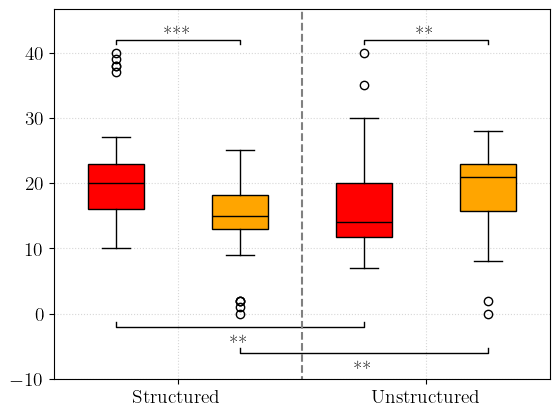

In [8]:
choices_hs_counts_2x2 = extract_2x2_data(df_hs_counts, ['H','S'], var='count')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(choices_hs_counts_2x2[:,i], choices_hs_counts_2x2[:,j], wendt_formula=True)
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(choices_hs_counts_2x2, ax, 
         box_colors=['red','orange','red','orange'],
         significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()

Comparisons (0, 1), p-value: 0.0000, corrected p value: 0.0000, effect size: 1.00
Comparisons (2, 3), p-value: 0.0000, corrected p value: 0.0000, effect size: 0.79
Comparisons (0, 2), p-value: 0.0031, corrected p value: 0.0041, effect size: 0.38
Comparisons (1, 3), p-value: 0.1612, corrected p value: 0.1612, effect size: -0.18


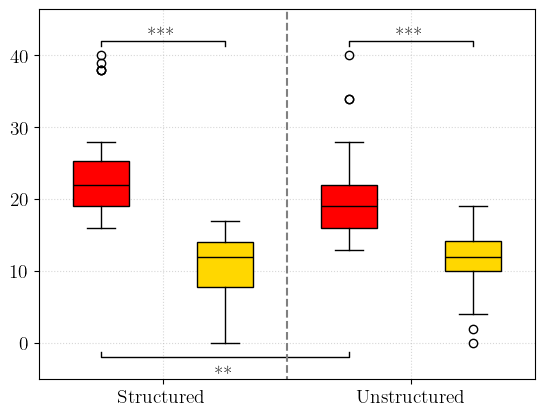

In [9]:
choices_hn_counts_2x2 = extract_2x2_data(df_hn_counts, ['H','C'], var='count')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(choices_hn_counts_2x2[:,i], choices_hn_counts_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(choices_hn_counts_2x2, ax, 
         box_colors=['red','gold','red','gold'],
         significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()

## Times

In [10]:
df_hs_times = standardize_df_data(df_hs, ['subject'], ['time_movement_first', 'time_movement_second', 'time_reaction_first', 'time_reaction_second'])
df_hn_times = standardize_df_data(df_hn, ['subject'], ['time_movement_first', 'time_movement_second', 'time_reaction_first', 'time_reaction_second'])


### Movement times
##### Hierarchical vs. Shortest

Comparisons (0, 1), p-value: 0.6826, corrected p value: 0.9101, effect size: 0.05
Comparisons (2, 3), p-value: 0.0052, corrected p value: 0.0207, effect size: 0.36
Comparisons (0, 2), p-value: 0.0151, corrected p value: 0.0302, effect size: -0.32
Comparisons (1, 3), p-value: 0.9540, corrected p value: 0.9540, effect size: 0.01


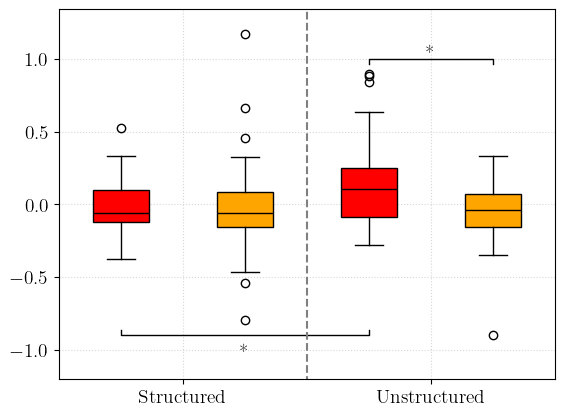

Comparisons (0, 1), p-value: 0.0000, corrected p value: 0.0000, effect size: 0.73
Comparisons (2, 3), p-value: 0.0000, corrected p value: 0.0000, effect size: 0.81
Comparisons (0, 2), p-value: 0.9655, corrected p value: 0.9655, effect size: 0.01
Comparisons (1, 3), p-value: 0.4529, corrected p value: 0.6039, effect size: -0.10


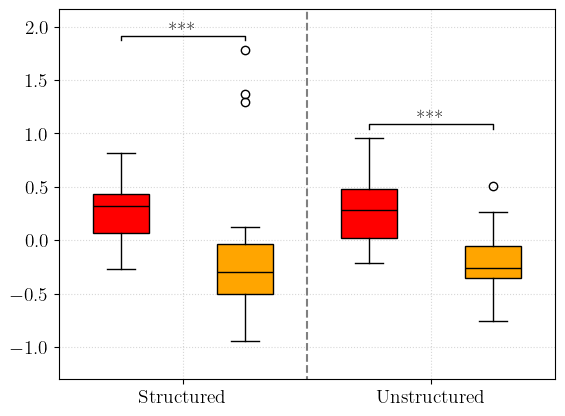

In [11]:
# ------------------------------ First movement ------------------------------ #
times_movement_first_hs_2x2 = extract_2x2_data(df_hs_times, ['H','S'], var='time_movement_first')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_first_hs_2x2[:,i], times_movement_first_hs_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_first_hs_2x2, ax, box_colors=['red','orange','red','orange'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()

# ------------------------------ Second movement ----------------------------- #
times_movement_second_hs_2x2 = extract_2x2_data(df_hs_times, ['H','S'], var='time_movement_second')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_second_hs_2x2[:,i], times_movement_second_hs_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_second_hs_2x2, ax, box_colors=['red','orange','red','orange'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()


##### Hierarchical vs. Neutral

Comparisons (0, 1), p-value: 0.0006, corrected p value: 0.0025, effect size: -0.44
Comparisons (2, 3), p-value: 0.4675, corrected p value: 0.6234, effect size: -0.09
Comparisons (0, 2), p-value: 0.0300, corrected p value: 0.0600, effect size: -0.28
Comparisons (1, 3), p-value: 0.5285, corrected p value: 0.5285, effect size: 0.08


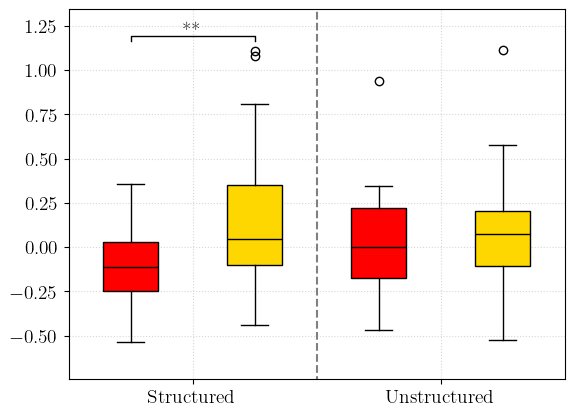

Comparisons (0, 1), p-value: 0.7913, corrected p value: 0.7913, effect size: -0.04
Comparisons (2, 3), p-value: 0.3481, corrected p value: 0.4642, effect size: -0.12
Comparisons (0, 2), p-value: 0.0026, corrected p value: 0.0106, effect size: -0.39
Comparisons (1, 3), p-value: 0.0196, corrected p value: 0.0392, effect size: -0.30


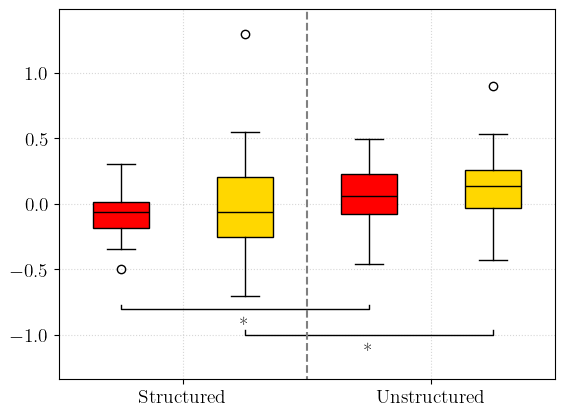

In [12]:
# ------------------------------ First movement ------------------------------ #
times_movement_first_hn_2x2 = extract_2x2_data(df_hn_times, ['H','C'], var='time_movement_first')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_first_hn_2x2[:,i], times_movement_first_hn_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_first_hn_2x2, ax, box_colors=['red','gold','red','gold'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()

# ------------------------------ Second movement ----------------------------- #
times_movement_second_hn_2x2 = extract_2x2_data(df_hn_times, ['H','C'], var='time_movement_second')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_second_hn_2x2[:,i], times_movement_second_hn_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_second_hn_2x2, ax, box_colors=['red','gold','red','gold'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()


### Reaction times
##### Hierarchical vs. Shortest

Comparisons (0, 1), p-value: 0.8361, corrected p value: 0.8361, effect size: 0.03
Comparisons (2, 3), p-value: 0.0207, corrected p value: 0.0413, effect size: 0.30
Comparisons (0, 2), p-value: 0.0003, corrected p value: 0.0011, effect size: -0.47
Comparisons (1, 3), p-value: 0.1659, corrected p value: 0.2211, effect size: -0.18


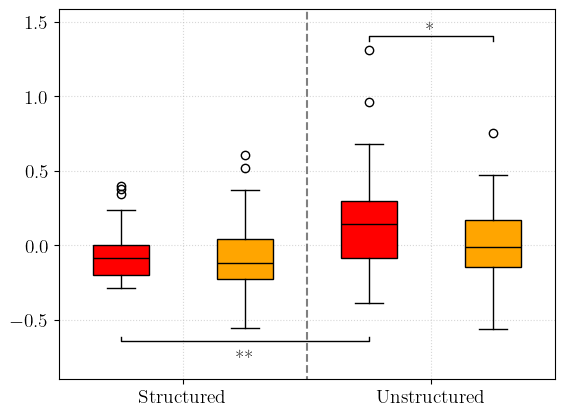

Comparisons (0, 1), p-value: 0.5801, corrected p value: 0.5801, effect size: -0.07
Comparisons (2, 3), p-value: 0.0682, corrected p value: 0.1365, effect size: -0.24
Comparisons (0, 2), p-value: 0.3146, corrected p value: 0.4195, effect size: -0.13
Comparisons (1, 3), p-value: 0.0276, corrected p value: 0.1102, effect size: -0.29


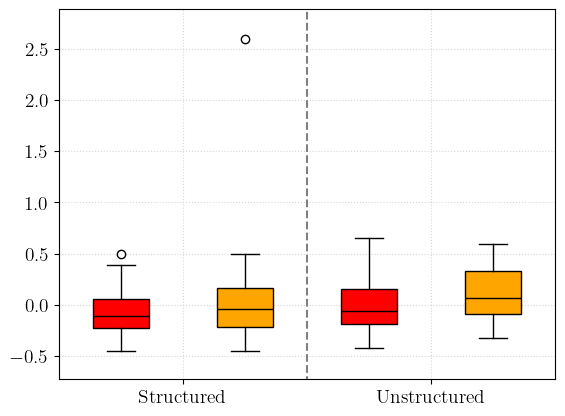

In [13]:
# ------------------------------ First movement ------------------------------ #
times_movement_first_hs_2x2 = extract_2x2_data(df_hs_times, ['H','S'], var='time_reaction_first')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_first_hs_2x2[:,i], times_movement_first_hs_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_first_hs_2x2, ax, box_colors=['red','orange','red','orange'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()

# ------------------------------ Second movement ----------------------------- #
times_movement_second_hs_2x2 = extract_2x2_data(df_hs_times, ['H','S'], var='time_reaction_second')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_second_hs_2x2[:,i], times_movement_second_hs_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_second_hs_2x2, ax, box_colors=['red','orange','red','orange'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()


##### Hierarchical vs. Neutral

Comparisons (0, 1), p-value: 0.1070, corrected p value: 0.1427, effect size: -0.21
Comparisons (2, 3), p-value: 0.0586, corrected p value: 0.1173, effect size: 0.25
Comparisons (0, 2), p-value: 0.0000, corrected p value: 0.0001, effect size: -0.54
Comparisons (1, 3), p-value: 0.5604, corrected p value: 0.5604, effect size: -0.08


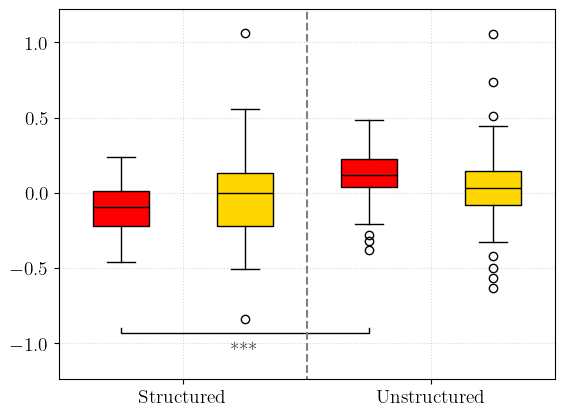

Comparisons (0, 1), p-value: 0.4329, corrected p value: 0.5772, effect size: -0.10
Comparisons (2, 3), p-value: 0.6896, corrected p value: 0.6896, effect size: -0.05
Comparisons (0, 2), p-value: 0.0004, corrected p value: 0.0017, effect size: -0.46
Comparisons (1, 3), p-value: 0.0682, corrected p value: 0.1365, effect size: -0.24


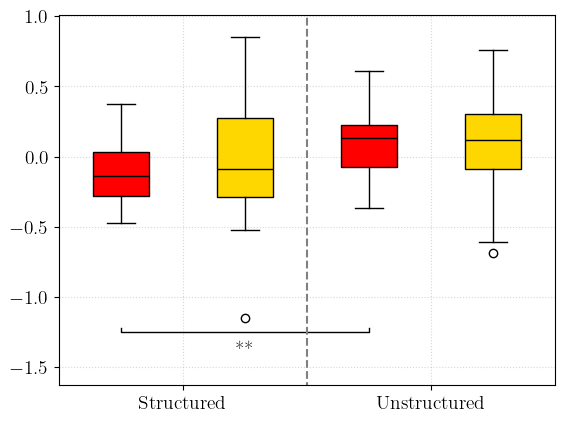

In [14]:
# ------------------------------ First movement ------------------------------ #
times_movement_first_hn_2x2 = extract_2x2_data(df_hn_times, ['H','C'], var='time_reaction_first')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_first_hn_2x2[:,i], times_movement_first_hn_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_first_hn_2x2, ax, box_colors=['red','gold','red','gold'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()

# ------------------------------ Second movement ----------------------------- #
times_movement_second_hn_2x2 = extract_2x2_data(df_hn_times, ['H','C'], var='time_reaction_second')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(times_movement_second_hn_2x2[:,i], times_movement_second_hn_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

plt.figure()
ax = plt.gca()
plot_2x2(times_movement_second_hn_2x2, ax, box_colors=['red','gold','red','gold'], significant_combinations=significant_combinations)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(ax.get_ylim()[0]*1.2, 1.05*ax.get_ylim()[1])
plt.show()
